# **<center>Machine Learning and Finance </center>**


## <center> CourseWork 2024 - StatArb </center>



In this coursework, you will delve into and replicate selected elements of the research detailed in the paper **[End-to-End Policy Learning of a Statistical Arbitrage Autoencoder Architecture](https://arxiv.org/pdf/2402.08233.pdf)**. **However, we will not reproduce the entire study.**

## Overview

This study redefines Statistical Arbitrage (StatArb) by combining Autoencoder architectures and policy learning to generate trading strategies. Traditionally, StatArb involves finding the mean of a synthetic asset through classical or PCA-based methods before developing a mean reversion strategy. However, this paper proposes a data-driven approach using an Autoencoder trained on US stock returns, integrated into a neural network representing portfolio trading policies to output portfolio allocations directly.


## Coursework Goal

This coursework will replicate these results, providing hands-on experience in implementing and evaluating this innovative end-to-end policy learning Autoencoder within financial trading strategies.

## Outline

- [Data Preparation and Exploration](#Data-Preparation-and-Exploration)
- [Fama French Analysis](#Fama-French-Analysis)
- [PCA Analysis](#PCA-Analysis)
- [Ornstein Uhlenbeck](#Ornstein-Uhlenbeck)
- [Autoencoder Analysis](#Autoencoder-Analysis)



**Description:**
The Coursework is graded on a 100 point scale and is divided into five  parts. Below is the mark distribution for each question:

| **Problem**  | **Question**          | **Number of Marks** |
|--------------|-----------------------|---------------------|
| **Part A**   | Question 1            | 4                   |
|              | Question 2            | 1                   |
|              | Question 3            | 3                   |
|              | Question 4            | 3                   |
|              | Question 5            | 1                   |
|              | Question 6            | 3                   |
|**Part  B**    | Question 7           | 1                   |
|              | Question 8            | 5                   |
|              | Question 9            | 4                   |
|              | Question 10           | 5                   |
|              | Question 11           | 2                   |
|              | Question 12           | 3                   |
|**Part  C**    | Question 13          | 3                   |
|              | Question 14           | 1                   |
|              | Question 15           | 3                   |
|              | Question 16           | 2                   |
|              | Question 17           | 7                   |
|              | Question 18           | 6                   |
|              | Question 19           | 3                   |
|  **Part  D** | Question 20           | 3                   |
|              | Question 21           | 5                   |
|              | Question 22           | 2                   |
|  **Part  E** | Question 23           | 2                   |
|              | Question 24           | 1                   |
|              | Question 25           | 3                   |
|              | Question 26           | 10                  |
|              | Question 27           | 1                   |
|              | Question 28           | 3                   |
|              | Question 29           | 3                   |
|              | Question 30           | 7                   |




Please read the questions carefully and do your best. Good luck!

## Objectives



## 1. Data Preparation and Exploration
Collect, clean, and prepare US stock return data for analysis.

## 2. Fama French Analysis
Utilize Fama French Factors to isolate the idiosyncratic components of stock returns, differentiating them from market-wide effects. This analysis helps in understanding the unique characteristics of individual stocks relative to broader market trends.

## 3. PCA Analysis
Employ Principal Component Analysis (PCA) to identify hidden structures and reduce dimensionality in the data. This method helps in extracting significant patterns that might be obscured in high-dimensional datasets.

## 4. Ornstein-Uhlenbeck Process
Analyze mean-reverting behavior in stock prices using the Ornstein-Uhlenbeck process. This stochastic process is useful for modeling and forecasting based on the assumption that prices will revert to a long-term mean.

## 5. Building a Basic Autoencoder Model
Construct and train a standard Autoencoder to extract residual idiosyncratic risk.








#Libraries

In [ ]:
#Data Download
import requests as re
from bs4 import BeautifulSoup
import yfinance as yf

#Data Management
import pandas as pd
import numpy as np

#Statistical Analysis
import statsmodels.api as sm
from statistics import mean, stdev

#Machine Learning
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

#Warnings
import warnings

#Visualisation
import matplotlib.pyplot as plt
import seaborn as sns





# Data Preparation and Exploration


---
<font color=green>Q1: (4 Marks)</font>
<br><font color='green'>
Write a Python function that accepts a URL parameter and retrieves the NASDAQ-100 companies and their ticker symbols by scraping the relevant Wikipedia page using **[Requests](https://pypi.org/project/requests/)** and **[BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)**. Your function should return the data as a list of tuples, with each tuple containing the company name and its ticker symbol. Then, call your function with the appropriate Wikipedia page URL and print the data in a 'Company: Ticker' format.

</font>

---


In [ ]:
url = 'https://en.wikipedia.org/wiki/Nasdaq-100'

def get_Nasdaq(url, show_data = False):
  # Sending a HTTP request to the specified URL
  response = re.get(url)
  soup = BeautifulSoup(response.text, 'html.parser')

  # Save tables by choosing class = wikitable sortable...
  tables = soup.find_all('table', {'class': 'wikitable'})

  # The third table contains the required data
  table = tables[3]

  # Transform HTML to Pandas
  data = pd.read_html(str(table))
  nasdaq = data[0]


  if show_data: display(nasdaq)

  #transform data frame in tuple list
  company_ticker = [(row['Ticker'], row['Company']) for index, row in nasdaq.iterrows()]

  return company_ticker

company_ticker = get_Nasdaq(url, show_data = True)

print(f'List of Tuples:\n {company_ticker}')


,Company,Ticker,GICS Sector,GICS Sub-Industry
0,Adobe Inc.,ADBE,Information Technology,Application Software
1,ADP,ADP,Industrials,Human Resource & Employment Services
2,Airbnb,ABNB,Consumer Discretionary,"Hotels, Resorts & Cruise Lines"
3,Alphabet Inc. (Class A),GOOGL,Communication Services,Interactive Media & Services
4,Alphabet Inc. (Class C),GOOG,Communication Services,Interactive Media & Services
...,...,...,...,...
96,Walgreens Boots Alliance,WBA,Consumer Staples,Drug Retail
97,Warner Bros. Discovery,WBD,Communication Services,Broadcasting
98,"Workday, Inc.",WDAY,Information Technology,Application Software
99,Xcel Energy,XEL,Utilities,Multi-Utilities


List of Tuples:
 [('ADBE', 'Adobe Inc.'), ('ADP', 'ADP'), ('ABNB', 'Airbnb'), ('GOOGL', 'Alphabet Inc. (Class A)'), ('GOOG', 'Alphabet Inc. (Class C)'), ('AMZN', 'Amazon'), ('AMD', 'Advanced Micro Devices Inc.'), ('AEP', 'American Electric Power'), ('AMGN', 'Amgen'), ('ADI', 'Analog Devices'), ('ANSS', 'Ansys'), ('AAPL', 'Apple Inc.'), ('AMAT', 'Applied Materials'), ('ASML', 'ASML Holding'), ('AZN', 'AstraZeneca'), ('TEAM', 'Atlassian'), ('ADSK', 'Autodesk'), ('BKR', 'Baker Hughes'), ('BIIB', 'Biogen'), ('BKNG', 'Booking Holdings'), ('AVGO', 'Broadcom Inc.'), ('CDNS', 'Cadence Design Systems'), ('CDW', 'CDW Corporation'), ('CHTR', 'Charter Communications'), ('CTAS', 'Cintas'), ('CSCO', 'Cisco'), ('CCEP', 'Coca-Cola Europacific Partners'), ('CTSH', 'Cognizant'), ('CMCSA', 'Comcast'), ('CEG', 'Constellation Energy'), ('CPRT', 'Copart'), ('CSGP', 'CoStar Group'), ('COST', 'Costco'), ('CRWD', 'CrowdStrike'), ('CSX', 'CSX Corporation'), ('DDOG', 'Datadog'), ('DXCM', 'DexCom'), ('FANG', 'Dia

---
<font color=green>Q2: (1 Mark)</font>
<br><font color='green'>
Given a list of tuples representing NASDAQ-100 companies (where each tuple contains a company name and its ticker symbol), write a Python script to extract all ticker symbols into a separate list called `tickers_list`.
</font>
---


In [ ]:
tickers_list = [ticker for ticker, _ in company_ticker]

print(f'Tickers List:\n {tickers_list}')

Tickers List:
 ['ADBE', 'ADP', 'ABNB', 'GOOGL', 'GOOG', 'AMZN', 'AMD', 'AEP', 'AMGN', 'ADI', 'ANSS', 'AAPL', 'AMAT', 'ASML', 'AZN', 'TEAM', 'ADSK', 'BKR', 'BIIB', 'BKNG', 'AVGO', 'CDNS', 'CDW', 'CHTR', 'CTAS', 'CSCO', 'CCEP', 'CTSH', 'CMCSA', 'CEG', 'CPRT', 'CSGP', 'COST', 'CRWD', 'CSX', 'DDOG', 'DXCM', 'FANG', 'DLTR', 'DASH', 'EA', 'EXC', 'FAST', 'FTNT', 'GEHC', 'GILD', 'GFS', 'HON', 'IDXX', 'ILMN', 'INTC', 'INTU', 'ISRG', 'KDP', 'KLAC', 'KHC', 'LRCX', 'LIN', 'LULU', 'MAR', 'MRVL', 'MELI', 'META', 'MCHP', 'MU', 'MSFT', 'MRNA', 'MDLZ', 'MDB', 'MNST', 'NFLX', 'NVDA', 'NXPI', 'ORLY', 'ODFL', 'ON', 'PCAR', 'PANW', 'PAYX', 'PYPL', 'PDD', 'PEP', 'QCOM', 'REGN', 'ROP', 'ROST', 'SIRI', 'SBUX', 'SNPS', 'TTWO', 'TMUS', 'TSLA', 'TXN', 'TTD', 'VRSK', 'VRTX', 'WBA', 'WBD', 'WDAY', 'XEL', 'ZS']


---
<font color=green>Q3: (3 Marks)</font>
<br><font color='green'>
Using **[yfinance](https://pypi.org/project/yfinance/)** library, write a Python script that accepts a list of stock ticker symbols. For each symbol, download the adjusted closing price data, store it in a dictionary with the ticker symbol as the key, and then convert the final dictionary into a Pandas DataFrame. Handle any errors encountered during data retrieval by printing a message indicating which symbol failed
</font>
---

In [ ]:
adjclose_dict = dict(zip(tickers_list, [None]*len(tickers_list)))

for ticker in tickers_list:
  try:
    stock_data = yf.download(ticker, start="2010-01-02", end="2024-04-22")["Adj Close"]
    adjclose_dict[ticker] = stock_data
  except:
    warnings.warn(f'No data found for {ticker}')
    del adjclose_dict[ticker]

stock_data_df = pd.DataFrame(adjclose_dict)

display(stock_data_df)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

,ADBE,ADP,ABNB,GOOGL,GOOG,AMZN,AMD,AEP,AMGN,ADI,...,TSLA,TXN,TTD,VRSK,VRTX,WBA,WBD,WDAY,XEL,ZS
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,37.090000,26.725901,NaN,15.684434,15.610239,6.695000,9.700000,19.888439,41.200783,22.441116,...,NaN,17.924690,NaN,28.847172,44.240002,23.950069,15.840572,NaN,12.918812,NaN
2010-01-05,37.700001,26.582378,NaN,15.615365,15.541497,6.734500,9.710000,19.660759,40.843868,22.405684,...,NaN,17.821312,NaN,29.040445,42.779999,23.757448,16.463976,NaN,12.765597,NaN
2010-01-06,37.619999,26.519985,NaN,15.221722,15.149715,6.612500,9.570000,19.859980,40.536949,22.363178,...,NaN,17.690384,NaN,29.417343,42.029999,23.577663,16.709249,NaN,12.790116,NaN
2010-01-07,36.889999,26.507502,NaN,14.867367,14.797037,6.500000,9.470000,20.030741,40.165771,22.186012,...,NaN,17.745510,NaN,29.369026,41.500000,23.718920,16.699030,NaN,12.734956,NaN
2010-01-08,36.689999,26.470055,NaN,15.065566,14.994298,6.676000,9.430000,20.269817,40.522671,22.313568,...,NaN,18.152105,NaN,28.992130,40.669998,23.751028,16.750128,NaN,12.741079,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-15,470.100006,244.080002,155.600006,154.860001,156.330002,183.619995,160.320007,80.123955,263.637512,189.536087,...,161.479996,165.159637,80.989998,222.179993,397.359985,17.407288,8.360000,259.630005,53.169998,174.850006
2024-04-16,476.220001,244.210007,156.660004,154.399994,156.000000,183.320007,163.460007,78.737549,263.766602,190.472351,...,157.110001,166.390747,82.129997,222.100006,394.170013,17.397425,8.140000,257.690002,52.529999,174.320007
2024-04-17,474.450012,242.899994,158.369995,155.470001,156.880005,181.279999,154.020004,80.450737,262.207672,188.679489,...,155.449997,164.514282,80.129997,222.250000,393.100006,17.387562,8.230000,257.019989,53.189999,172.960007


---
<font color=green>Q4: (3 Marks)</font>
<br><font color='green'>
Write a Python script to analyze stock data stored in a dictionary `stock_data` (where each key is a stock ticker symbol, and each value is a Pandas Series of adjusted closing prices). The script should:
1. Convert the dictionary into a DataFrame.
2. Calculate the daily returns for each stock.
3. Identify columns (ticker symbols) with at least 2000 non-NaN values in their daily returns.
4. Create a new DataFrame that only includes these filtered ticker symbols.
5. Remove any remaining rows with NaN values in this new DataFrame.
</font>

---

In [ ]:
daily_returns_df = stock_data_df.pct_change()


missing_values = daily_returns_df.isna().sum()
missing_values.head(10)

drop_list = sorted(list(missing_values[len(daily_returns_df) - missing_values <= 2000].index))

if len(drop_list) >= 1:
  warnings.warn(f"Significant Missing Data found for {drop_list}")
  daily_returns_df = daily_returns_df.drop(labels=drop_list, axis=1)

else:
  print("No Missing Data\n")



daily_returns_df = daily_returns_df.dropna()

display(daily_returns_df)


<ipython-input-108-318d437282c6>:10: UserWarning: Significant Missing Data found for ['ABNB', 'CEG', 'CRWD', 'DASH', 'DDOG', 'GEHC', 'GFS', 'MDB', 'MRNA', 'PDD', 'TTD', 'ZS']
  warnings.warn(f"Significant Missing Data found for {drop_list}")


,ADBE,ADP,GOOGL,GOOG,AMZN,AMD,AEP,AMGN,ADI,ANSS,...,TTWO,TMUS,TSLA,TXN,VRSK,VRTX,WBA,WBD,WDAY,XEL
Date,,,,,,,,,,,,,,,,,,,,,
2015-12-10,-0.006699,0.006004,-0.003292,-0.002861,-0.003715,0.042553,-0.024355,0.011273,0.008826,0.004968,...,-0.004777,0.007485,0.011358,0.002995,-0.002616,0.010279,0.000959,-0.002109,0.005037,-0.013888
2015-12-11,0.027653,-0.024924,-0.012657,-0.014130,-0.033473,-0.036735,-0.005831,-0.028309,-0.003850,-0.013951,...,-0.011575,-0.009356,-0.044259,-0.012647,-0.015995,-0.034709,-0.020499,-0.035928,-0.057630,0.004311
2015-12-14,0.020127,0.015241,0.016151,0.012045,0.027744,-0.008475,-0.000366,0.019079,-0.001932,0.003899,...,0.005141,0.014444,0.007188,0.000178,0.014390,-0.016491,0.010403,-0.033613,0.000253,0.010017
2015-12-15,0.008149,0.010284,-0.003213,-0.005844,0.001110,0.008547,0.027502,0.028525,-0.004752,0.009544,...,0.023018,0.044907,0.011483,0.023657,0.013924,0.013656,-0.005451,0.002646,-0.000380,0.007934
2015-12-16,0.016380,0.008541,0.021708,0.019761,0.026008,0.076271,0.017309,0.012053,0.017330,0.008354,...,0.006389,0.025419,0.060699,0.009035,0.021116,0.010658,0.031665,0.024887,0.029378,0.023896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-15,-0.008416,0.000943,-0.018196,-0.017966,-0.013485,-0.018128,-0.014494,-0.006622,-0.010298,-0.018073,...,-0.013377,-0.001437,-0.055949,0.000120,-0.001573,0.002043,-0.011205,0.002398,-0.015397,0.000000
2024-04-16,0.013018,0.000533,-0.002970,-0.002111,-0.001634,0.019586,-0.017303,0.000490,0.004940,-0.004114,...,0.001032,-0.000188,-0.027062,0.007454,-0.000360,-0.008028,-0.000567,-0.026316,-0.007472,-0.012037
2024-04-17,-0.003717,-0.005364,0.006930,0.005641,-0.011128,-0.057751,0.021758,-0.005910,-0.009413,-0.003641,...,-0.015744,0.001877,-0.010566,-0.011277,0.000675,-0.002715,-0.000567,0.011056,-0.002600,0.012564


---
<font color=green>Q5: (1 Mark)</font>
<br><font color='green'>
Download the dataset named `df_filtered_nasdaq_100` from the GitHub repository of the course.
</font>

---

In [ ]:
url_nasdaq = 'https://raw.githubusercontent.com/Jandsy/ml_finance_imperial/main/Coursework/df_filtered_nasdaq_100.csv'

df_filtered_nasdaq_100 = pd.read_csv(url_nasdaq,index_col=0,parse_dates=[0])

display(df_filtered_nasdaq_100)

,ADBE,ADP,GOOGL,GOOG,AMZN,AMD,AEP,AMGN,ADI,ANSS,...,TTWO,TMUS,TSLA,TXN,VRSK,VRTX,WBA,WBD,WDAY,XEL
Date,,,,,,,,,,,,,,,,,,,,,
2015-12-10,-0.006699,0.006004,-0.003292,-0.002861,-0.003715,0.042553,-0.024356,0.011274,0.008826,0.004968,...,-0.004777,0.007485,0.011358,0.002996,-0.002616,0.010279,0.000960,-0.002109,0.005037,-0.013889
2015-12-11,0.027653,-0.024924,-0.012657,-0.014130,-0.033473,-0.036735,-0.005831,-0.028308,-0.003850,-0.013951,...,-0.011575,-0.009356,-0.044259,-0.012648,-0.015996,-0.034709,-0.020499,-0.035928,-0.057630,0.004311
2015-12-14,0.020127,0.015241,0.016151,0.012045,0.027744,-0.008475,-0.000366,0.019078,-0.001932,0.003899,...,0.005141,0.014444,0.007188,0.000178,0.014390,-0.016491,0.010402,-0.033613,0.000253,0.010017
2015-12-15,0.008149,0.010283,-0.003213,-0.005844,0.001110,0.008547,0.027503,0.028525,-0.004752,0.009544,...,0.023018,0.044907,0.011483,0.023657,0.013923,0.013656,-0.005450,0.002646,-0.000380,0.007934
2015-12-16,0.016380,0.008541,0.021708,0.019761,0.026008,0.076271,0.017309,0.012053,0.017330,0.008354,...,0.006389,0.025419,0.060699,0.009036,0.021117,0.010658,0.031664,0.024887,0.029378,0.023897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-06,0.015241,0.003514,0.005142,0.004971,0.013372,0.034396,0.002370,-0.037939,0.018484,0.006478,...,0.016863,-0.013548,0.019703,0.015427,0.019087,0.003540,-0.030881,-0.001255,-0.022949,0.002028
2024-05-07,-0.002674,0.009805,0.018739,0.018548,0.000318,-0.008666,0.011936,0.002738,0.001230,0.010728,...,-0.000067,-0.001109,-0.037616,0.012752,0.021252,0.019230,0.005214,-0.023869,-0.001921,0.012141
2024-05-08,-0.008471,-0.008894,-0.010920,-0.010521,-0.004026,-0.005245,0.007900,0.023343,0.006337,0.005907,...,-0.015910,0.003946,-0.017378,0.007007,-0.009838,0.020915,-0.006916,0.003861,0.000802,-0.001636


---
<font color=green>Q6: (3 Marks) </font>
<br><font color='green'>
Conduct an in-depth analysis of the `df_filtered_nasdaq_100` dataset from GitHub. Answer the following questions:
- Which stock had the best performance over the entire period?
- What is the average daily return of 'AAPL'?
- What is the worst daily return? Provide the stock name and the date it occurred.
</font>

---

The best performing stock is NVDA and has a cummulative returns of 111.588 %
The average daily return of AAPL is 0.0011 %
The worst daily return is -0.4465, and was realised by FANG on 2020-03-09 00:00:00


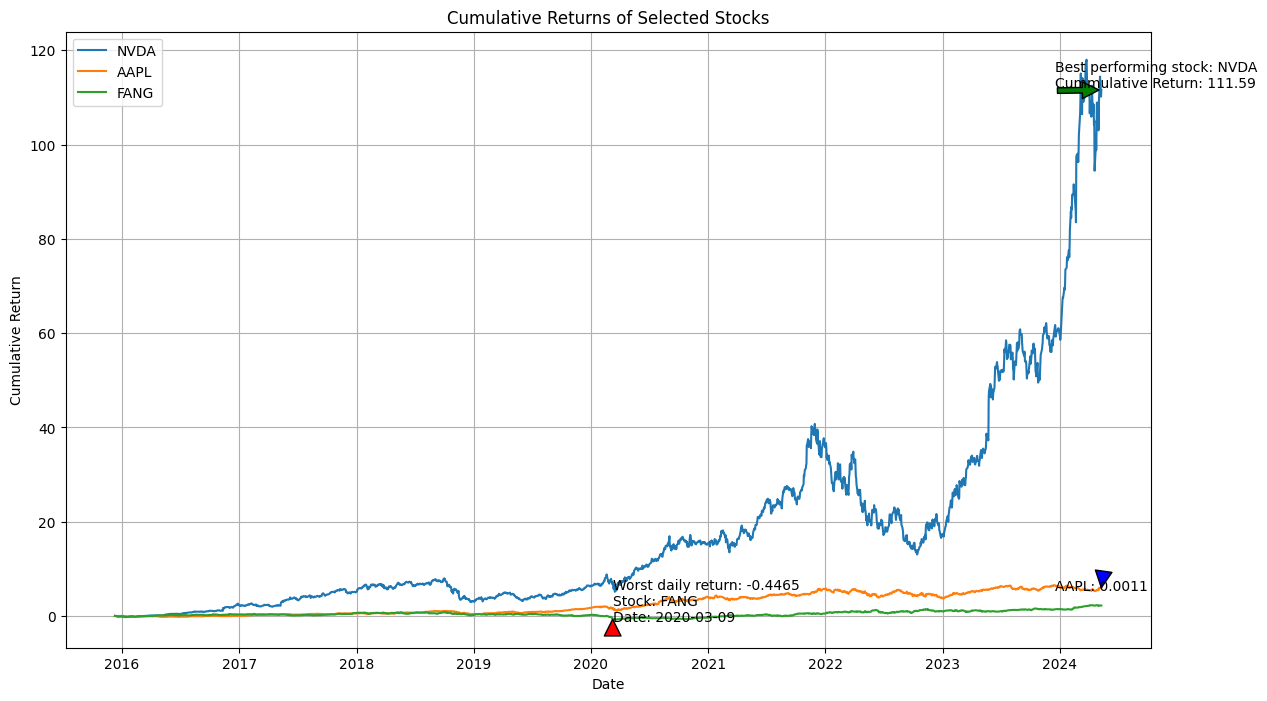

In [ ]:
cumulative_returns = (1 + df_filtered_nasdaq_100).cumprod() - 1
best_performance_stock = cumulative_returns.iloc[-1].idxmax()
best_performance_value = cumulative_returns.iloc[-1].max()

print(f'The best performing stock is {best_performance_stock} and has a cummulative returns of {best_performance_value:.3f} %')

average_daily_return_aapl = df_filtered_nasdaq_100['AAPL'].mean()

print(f'The average daily return of AAPL is {average_daily_return_aapl:.4f} %')

min_return = df_filtered_nasdaq_100.min().min()
min_return_stock = df_filtered_nasdaq_100.min().idxmin()
min_return_date = df_filtered_nasdaq_100[df_filtered_nasdaq_100[min_return_stock] == min_return].index[0]

print(f'The worst daily return is {min_return:.4f}, and was realised by {min_return_stock} on {min_return_date}')



plt.figure(figsize=(14, 8))
for stock in [best_performance_stock, 'AAPL', min_return_stock]:
    plt.plot(cumulative_returns.index, cumulative_returns[stock], label=stock)

# Annotations
plt.annotate(f'Best performing stock: {best_performance_stock}\nCummulative Return: {best_performance_value:.2f}',
             xy=(cumulative_returns.index[-1], cumulative_returns[best_performance_stock].iloc[-1]),
             xytext=(cumulative_returns.index[-100], cumulative_returns[best_performance_stock].iloc[-1] + 0.5),
             arrowprops=dict(facecolor='green', shrink=0.05))

plt.annotate(f'AAPL: {average_daily_return_aapl:.4f}',
             xy=(cumulative_returns.index[-1], cumulative_returns['AAPL'].iloc[-1]),
             xytext=(cumulative_returns.index[-100], cumulative_returns['AAPL'].iloc[-1] - 0.5),
             arrowprops=dict(facecolor='blue', shrink=0.05))

plt.annotate(f'Worst daily return: {min_return:.4f}\nStock: {min_return_stock}\nDate: {min_return_date.date()}',
             xy=(min_return_date, cumulative_returns[min_return_stock].loc[min_return_date]),
             xytext=(min_return_date, cumulative_returns[min_return_stock].loc[min_return_date] - 0.5),
             arrowprops=dict(facecolor='red', shrink=0.05))

# Plot settings
plt.title('Cumulative Returns of Selected Stocks')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.show()


# Fama French Analysis

The Fama-French five-factor model is an extension of the classic three-factor model used in finance to describe stock returns. It is designed to better capture the risk associated with stocks and explain differences in returns. This model includes the following factors:

1. **Market Risk (MKT)**: The excess return of the market over the risk-free rate. It captures the overall market's premium.
2. **Size (SMB, "Small Minus Big")**: The performance of small-cap stocks relative to large-cap stocks.
3. **Value (HML, "High Minus Low")**: The performance of stocks with high book-to-market values relative to those with low book-to-market values.
4. **Profitability (RMW, "Robust Minus Weak")**: The difference in returns between companies with robust (high) and weak (low) profitability.
5. **Investment (CMA, "Conservative Minus Aggressive")**: The difference in returns between companies that invest conservatively and those that invest aggressively.

## Additional Factor

6. **Momentum (MOM)**: This factor represents the tendency of stocks that have performed well in the past to continue performing well, and the reverse for stocks that have performed poorly.

### Mathematical Representation

The return of a stock $R_i^t$ at time $t$ can be modeled as follows :

$$
R_i^t - R_f^t = \alpha_i^t + \beta_{i,MKT}^t(R_M^t - R_f^t) + \beta_{i,SMB}^t \cdot SMB^t + \beta_{i,HML}^t \cdot HML^t + \beta_{i,RMW}^t \cdot RMW^t + \beta_{i,CMA}^t \cdot CMA^t + \beta_{i,MOM}^t \cdot MOM^t + \epsilon_i^t
$$

Where:
- $ R_i^t $ is the return of stock $i$ at time $t$
- $R_f^t $is the risk-free rate at time $t$
- $ R_M^t $ is the market return at time $t$
- $\alpha_i^t $ is the abnormal return or alpha of stock $ i $ at time $t$
- $\beta^t $ coefficients represent the sensitivity of the stock returns to each factor at time $t$
- $\epsilon_i^t $ is the error term or idiosyncratic risk unique to stock $ i $ at time $t$

This model is particularly useful for identifying which factors significantly impact stock returns and for constructing a diversified portfolio that is optimized for given risk preferences.




---
<font color=green>Q7: (1 Mark) </font>
<br><font color='green'>
Download the `fama_french_dataset` from the course's GitHub account.
</font>

---

In [ ]:
url_fama_french = 'https://raw.githubusercontent.com/Jandsy/ml_finance_imperial/main/Coursework/fama_french_dataset.csv'

fama_french_dataset_df = pd.read_csv(url_fama_french,index_col=0,parse_dates=[0])

display(fama_french_dataset_df)

,Mkt-RF,SMB,HML,RMW,CMA,RF,Mom
1963-07-01,-0.67,0.02,-0.35,0.03,0.13,0.012,-0.21
1963-07-02,0.79,-0.28,0.28,-0.08,-0.21,0.012,0.42
1963-07-03,0.63,-0.18,-0.10,0.13,-0.25,0.012,0.41
1963-07-05,0.40,0.09,-0.28,0.07,-0.30,0.012,0.07
1963-07-08,-0.63,0.07,-0.20,-0.27,0.06,0.012,-0.45
...,...,...,...,...,...,...,...
2024-03-22,-0.23,-0.98,-0.53,0.29,-0.37,0.021,0.43
2024-03-25,-0.26,-0.10,0.88,-0.22,-0.17,0.021,-0.34
2024-03-26,-0.26,0.10,-0.13,-0.50,0.23,0.021,0.09
2024-03-27,0.88,1.29,0.91,-0.14,0.58,0.021,-1.34


---
<font color=green>Q8: (5 Marks)</font>
<br><font color='green'>

Write a Python function called `get_sub_df_ticker(ticker, date, df_filtered, length_history)` that extracts a historical sub-dataframe for a given `ticker` from `df_filtered`. The function should use `length_history` to determine the number of trading days to include, ending at the specified `date`. Return the sub-dataframe for the specified `ticker`.
</font>

---


In [ ]:
def get_sub_df_ticker(ticker, date, df_filtered, length_history):

    end = df_filtered.index.get_loc(date)
    start = max(0, end - length_history + 1)
    sub_df = df_filtered.iloc[start:end + 1]
    sub_df = sub_df[ticker]

    return sub_df

get_sub_df_ticker("AAPL", '10-10-2023', df_filtered_nasdaq_100, 100)


Date
2023-05-18    0.013666
2023-05-19    0.000628
2023-05-22   -0.005481
2023-05-23   -0.015155
2023-05-24    0.001632
                ...   
2023-10-04    0.007309
2023-10-05    0.007198
2023-10-06    0.014750
2023-10-09    0.008451
2023-10-10   -0.003352
Name: AAPL, Length: 100, dtype: float64

---
<font color=green>Q9: (4 Marks)</font>
<br><font color='green'>
Create a Python function named `df_ticker_with_fama_french(ticker, date, df_filtered, length_history, fama_french_data)` that uses `get_sub_df_ticker` to extract historical data for a specific `ticker`. Incorporate the Fama-French factors from `fama_french_data` into the extracted sub-dataframe. Adjust the ticker's returns by subtracting the risk-free rate ('RF') and add other relevant Fama-French factors ('Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', and 'Mom'). Return the resulting sub-dataframe.
</font>

---

In [ ]:
def df_ticker_with_fama_french(ticker, date, df_filtered, length_history, fama_french_data):

  sub_df = get_sub_df_ticker(ticker, date, df_filtered, length_history)

  sub_df_ff = pd.merge(sub_df, fama_french_data, left_index=True, right_index=True)
  sub_df_ff[ticker] = sub_df_ff[ticker] - sub_df_ff['RF']

  return sub_df_ff


df_ticker_with_fama_french("AAPL", '10-10-2023', df_filtered_nasdaq_100, 100, fama_french_dataset_df)

,AAPL,Mkt-RF,SMB,HML,RMW,CMA,RF,Mom
2023-05-18,-0.002334,0.99,-0.23,-0.38,0.16,-0.70,0.016,-0.30
2023-05-19,-0.015372,-0.26,-0.39,-0.30,-0.02,0.18,0.016,0.54
2023-05-22,-0.021481,0.17,1.12,-0.22,-1.24,-0.91,0.016,-1.97
2023-05-23,-0.031155,-1.09,0.61,1.05,0.21,0.19,0.016,-0.98
2023-05-24,-0.014368,-0.72,-0.39,-0.19,-0.03,-0.05,0.016,0.93
...,...,...,...,...,...,...,...,...
2023-10-04,-0.013691,0.77,-0.53,-0.39,-0.39,-0.33,0.021,0.93
2023-10-05,-0.013802,-0.15,0.28,0.08,-0.45,-0.12,0.021,-0.16
2023-10-06,-0.006250,1.21,-0.44,-0.55,-0.32,-0.52,0.021,0.69
2023-10-09,-0.012549,0.58,-0.16,0.26,0.81,-0.38,0.021,0.14


---
<font color=green>Q10: (5 Marks) </font>
<br><font color='green'>
Write a Python function named `extract_beta_fama_french` to perform a rolling regression analysis for a given stock at a specific time point using the Fama-French model. The function should accept the following parameters:

- `ticker`: A string indicating the stock symbol.
- `date`: A string specifying the date for the analysis.
- `length_history`: An integer representing the number of days of historical data to include.
- `df_filtered`: A pandas DataFrame (assumed to be derived from question 5) containing filtered stock data.
- `fama_french_data`: A pandas DataFrame (assumed to be from question 7) that includes Fama-French factors.

Utilize the `statsmodels.api` library to conduct the regression.
</font>

---

In [ ]:
def extract_beta_fama_french(ticker, date, length_history, df_filtered, fama_french_data):

  sub_df_ff = df_ticker_with_fama_french(ticker, date, length_history, df_filtered, fama_french_data)
  endog = sub_df_ff[ticker]
  exog = sub_df_ff.drop([ticker,'RF'], axis=1)
  exog = sm.add_constant(exog)

  ff_regression = sm.OLS(endog, exog)
  ff_res = ff_regression.fit()

  summary = ff_res.summary()

  return(summary)


print(extract_beta_fama_french("AAPL", '10-10-2023', df_filtered_nasdaq_100, 100, fama_french_dataset_df))


                            OLS Regression Results                            
Dep. Variable:                   AAPL   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     17.97
Date:                Wed, 05 Jun 2024   Prob (F-statistic):           9.74e-14
Time:                        15:53:23   Log-Likelihood:                 334.42
No. Observations:                 100   AIC:                            -654.8
Df Residuals:                      93   BIC:                            -636.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0200      0.001    -21.468      0.0

---
<font color=green>Q11: (2 Marks) </font>
<br><font color='green'>
Apply the `extract_beta_fama_french` function to the stock symbol 'AAPL' for the date '2024-03-28', using a historical data length of 252 days. Ensure that the `df_filtered` and `fama_french_data` DataFrames are correctly prepared and available in your environment before executing this function. The parameters for the function call are set as follows:

- **Ticker**: 'AAPL'
- **Date**: '2024-03-28'
- **Length of History**: 252 days
</font>

---



In [ ]:
print(extract_beta_fama_french("AAPL", '28-03-2024', df_filtered_nasdaq_100, 252, fama_french_dataset_df))

                            OLS Regression Results                            
Dep. Variable:                   AAPL   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.462
Method:                 Least Squares   F-statistic:                     36.96
Date:                Wed, 05 Jun 2024   Prob (F-statistic):           9.04e-32
Time:                        15:53:23   Log-Likelihood:                 827.28
No. Observations:                 252   AIC:                            -1641.
Df Residuals:                     245   BIC:                            -1616.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0207      0.001    -35.204      0.0

---
<font color=green>Q12: (2 Marks)</font>
<br><font color='green'>
Once the `extract_beta_fama_french` function has been applied to 'AAPL' with the specified parameters, the next step is to analyze the regression summary to identify which Fama-French factor explains the most variance in 'AAPL' returns during the specified period.

Follow these steps to perform the analysis:

1. **Review the Summary**: Examine the regression output, focusing on the coefficients and their statistical significance (p-values).
2. **Identify Key Factor**: Determine which factor has the highest absolute coefficient value and is statistically significant (typically p < 0.05). This factor can be considered as having the strongest influence on 'AAPL' returns for the period.

</font>

---

**Write your answers here:**

# PCA Analysis


In literature, another method exists for extracting residuals for each stock, utilizing the PCA approach to identify hidden factors in the data. Let's describe this method.

The return of a stock $R_i^t$ at time $t$ can be modeled as follows :

$$
R_i^t  = \sum_{j=1}^m\beta_{i,j}^t F_j^t  + \epsilon_i^t
$$

Where:
- $ R_i^t $ is the return of stock $i$ at time $t$
- $m$ is the number of factors selected from PCA
-  $ F_j^t $ is the $j$-th hidden factor constructed from PCA at time $t$
- $\beta_{i,j}^t $ are the coefficients representing the sensitivity of the stock returns to each hidden factor.
- $\epsilon_i^t $  is the residual term for stock $i$ at time $t$, representing the portion of the return not explained by the PCA factors.

### Representation of Stock Return Data

Consider the return data for $N$ stocks over $T$ periods, represented by the matrix $R$ of size $T \times N$:

$$
R = \left[
\begin{array}{cccc}
R_1^T & R_2^T & \cdots & R_N^T \\
R_1^{T-1} & R_2^{T-1} & \cdots & R_N^{T-1} \\
\vdots & \vdots & \ddots & \vdots \\
R_1^1 & R_2^1 & \cdots & R_N^1 \\
\end{array}
\right]
$$

Each element $R_i^k$ of the matrix represents the return of stock $i$ at time $k$ and is defined as:

$$
R_i^k = \frac{S_{i,k} - S_{i, k-1}}{S_{i, k-1}}, \quad k=1,\cdots, T, \quad i=1,\cdots,N
$$

where $S_{i,k}$ denotes the adjusted close price of stock $i$ at time $k$.

### Standardization of Returns

To adjust for varying volatilities across stocks, we standardize the returns as follows:

$$
Z_i^t = \frac{R_i^t - \mu_i}{\sigma_i}
$$

where $\mu_i$ and $\sigma_i$ are the mean and standard deviation of returns for stock $i$ over the period $[t-T, t]$, respectively.

### Empirical Correlation Matrix

The empirical correlation matrix $C$ is computed from the standardized returns:

$$
C = \frac{1}{T-1} Z^T Z
$$

where $Z^T$ is the transpose of matrix $Z$.

### Singular Value Decomposition (SVD)

We apply Singular Value Decomposition to the correlation matrix $C$:

$$
C = U \Sigma V^T
$$

Here, $U$ and $V$ are orthogonal matrices representing the left and right singular vectors, respectively, and $\Sigma$ is a diagonal matrix containing the singular values, which are the square roots of the eigenvalues.

### Construction of Hidden Factors

For each of the top $m$ components, we construct the selected hidden factors as follows:

$$
F_j^t = \sum_{i=1}^N \frac{\lambda_{i,j}}{\sigma_i} R_i^t
$$

where $\lambda_{i,j}$ is the $i$-th component of the $j$-th eigenvector (ranked by eigenvalue magnitude).


---
<font color=green>Q13 (3 Marks):

For the specified period from March 29, 2023 ('2023-03-29'), to March 28, 2024 ('2024-03-28'), generate the matrix $Z$ by standardizing the stock returns using the DataFrame `df_filtered_new`
</font>

---


In [ ]:
df_filtered_new = df_filtered_nasdaq_100.loc['2023-03-29':'2024-03-28']

mean_returns = df_filtered_new.mean()
std_returns = df_filtered_new.std()

Z_matrix_return = (df_filtered_new - mean_returns) / std_returns

print(Z_matrix_return)

                ADBE       ADP     GOOGL      GOOG      AMZN       AMD  \
Date                                                                     
2023-03-29  0.658925  2.189521  0.106285  0.207821  1.503570  0.444433   
2023-03-30  0.273051 -0.221306 -0.389329 -0.434766  0.787034  0.526996   
2023-03-31  0.360570  1.136308  1.540732  1.439604  0.531735 -0.056439   
2023-04-03 -0.713053 -2.259591  0.252735  0.407399 -0.591892 -0.600163   
2023-04-04  0.560730 -1.137430  0.099652  0.013877  0.658632 -0.342217   
...              ...       ...       ...       ...       ...       ...   
2024-03-22 -1.146803 -0.516681  1.151431  1.085070  0.074915  0.081847   
2024-03-25  0.659349 -1.221008 -0.372489 -0.341074  0.109668 -0.292706   
2024-03-26 -0.032708  0.234343  0.131651  0.109342 -0.556130 -0.244717   
2024-03-27 -0.363721  1.052056 -0.024166 -0.010591  0.315892  0.224881   
2024-03-28 -0.048375  0.411934 -0.078409  0.019962  0.022729  0.067776   

                 AEP      AMGN       

---
<font color=green>Q14: (1 Mark) </font>
<br><font color='green'>
Download the `Z_matrix` matrix from the course's GitHub account.
</font>

---

In [ ]:
Z_matrix = pd.read_csv("https://raw.githubusercontent.com/Jandsy/ml_finance_imperial/main/Coursework/Z_matrix.csv", index_col = 'Date', parse_dates=True)

print(Z_matrix)

                ADBE       ADP     GOOGL      GOOG      AMZN       AMD  \
Date                                                                     
2023-03-29  0.658925  2.189521  0.106285  0.207821  1.503570  0.444433   
2023-03-30  0.273051 -0.221306 -0.389329 -0.434766  0.787034  0.526996   
2023-03-31  0.360570  1.136308  1.540732  1.439604  0.531735 -0.056439   
2023-04-03 -0.713053 -2.259591  0.252735  0.407399 -0.591892 -0.600163   
2023-04-04  0.560730 -1.137430  0.099652  0.013877  0.658632 -0.342217   
...              ...       ...       ...       ...       ...       ...   
2024-03-22 -1.146803 -0.516681  1.151431  1.085070  0.074915  0.081847   
2024-03-25  0.659349 -1.221008 -0.372489 -0.341074  0.109668 -0.292706   
2024-03-26 -0.032708  0.234343  0.131651  0.109342 -0.556130 -0.244717   
2024-03-27 -0.363721  1.052056 -0.024166 -0.010591  0.315892  0.224881   
2024-03-28 -0.048375  0.411934 -0.078409  0.019962  0.022729  0.067776   

                 AEP      AMGN       

---
<font color=green>Q15: (3 Marks) </font>
<br><font color='green'>
For the specified period from March 29, 2023 ('2023-03-29'), to March 28, 2024 ('2024-03-28'), compute the correlation matrix
$C$ using the matrix `Z_matrix`.
</font>

---

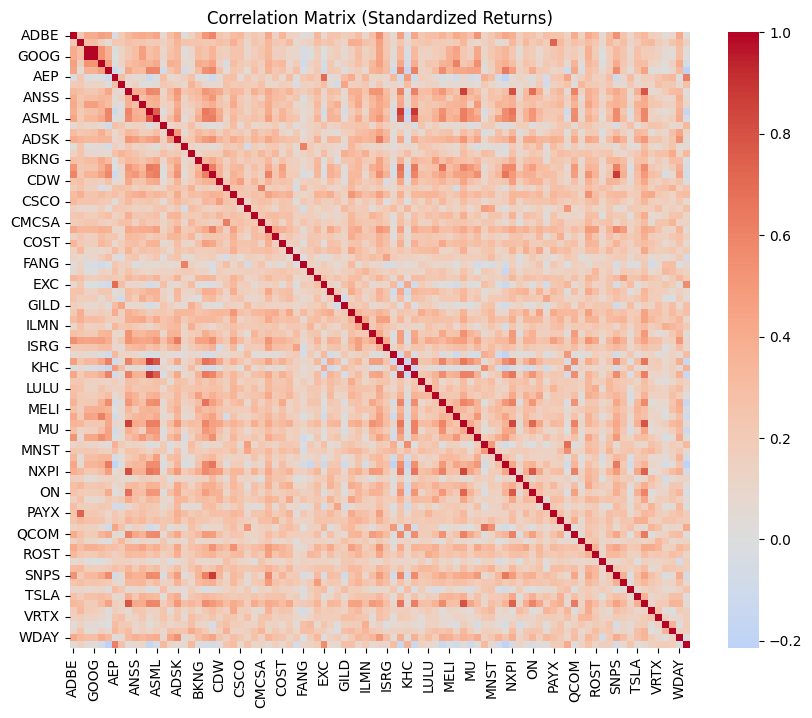

In [ ]:

Z_T_Z = Z_matrix.T @ Z_matrix
C = (1/(len(Z_matrix) - 1)) * Z_T_Z

plt.figure(figsize=(10, 8))
sns.heatmap(C , annot=False, cmap='coolwarm', center=0)
plt.title('Correlation Matrix (Standardized Returns)')
plt.show()

---
<font color=green>Q16: (2 Marks) </font>
<br><font color='green'>
Refind the correlation matrix from the from March 29, 2023 ('2023-03-29'), to March 28, 2024 ('2024-03-28') using pandas correlation matrix method.
</font>

---

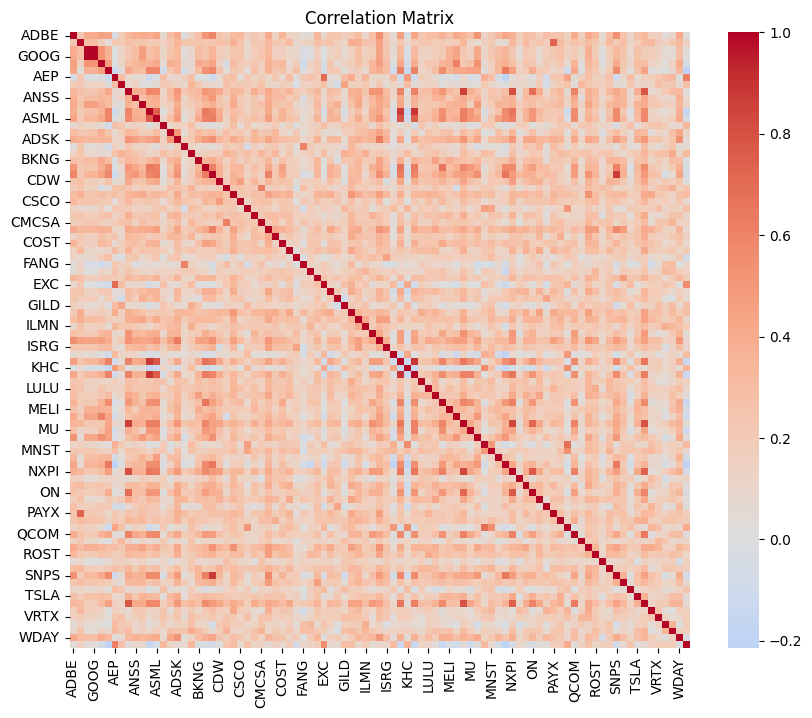

In [ ]:
correlation = df_filtered_new.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation , annot=False, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

---
<font color=green>Q17: (7 Marks) </font>
<br><font color='green'>
Conduct Singular Value Decomposition on the correlation matrix $C$. Follow these steps:


1.   **Perform SVD**: Decompose the matrix $C$ into its singular values and vectors.
2.   **Rank Eigenvalues**: Sort the resulting singular values (often squared to compare to eigenvalues) in descending order.
3. **Select Components**: Extract the first 20 components based on the largest singular values.
4. **Variance Explained**: Print the variance explained by the first 20 Components and dimensions of differents matrix that you created.

</font>

---

In [ ]:
#1 Perform SVD
U, Sigma, V_t = np.linalg.svd(correlation)

#2 Rank Eigenvalues
eigenvalues = Sigma**2
eigenvalues_sort = np.sort(eigenvalues)[::-1]

#3 Select 20 components
principal_components = U[:, :20]

#4 Explain Variance
total_variance = np.sum(eigenvalues)
variance_explained = np.sum(eigenvalues_sort[:20]) / total_variance

print(f"Variance explained by the first 20 components: {variance_explained:.2%}")
print(f"Dimensions of U: {U.shape}")
print(f"Dimensions of S: {Sigma.shape}")
print(f"Dimensions of Vt: {V_t.shape}")
print(f"Dimensions of the first 20 components: {principal_components.shape}")


Variance explained by the first 20 components: 97.24%
Dimensions of U: (89, 89)
Dimensions of S: (89,)
Dimensions of Vt: (89, 89)
Dimensions of the first 20 components: (89, 20)


---
<font color=green>Q18: (6 Marks) </font>
<br><font color='green'>
Extract the 20 hidden factors in a matrix F. Check that shape of F is $(252,20)$
</font>

</font>

---

In [ ]:
m = 20

# Calculate the hidden factors
F = np.zeros((len(df_filtered_new), m))

for j in range(m):
    for t in range(len(df_filtered_new)):
      F[t, j] = np.sum(U[:, j] * Z_matrix.iloc[t, :] / std_returns)

F_df = pd.DataFrame(F, index=df_filtered_new.index, columns=[f'Factor {j+1}' for j in range(m)])

print(F_df)

              Factor 1    Factor 2    Factor 3    Factor 4   Factor 5  \
Date                                                                    
2023-03-29 -581.045353 -183.078510  -43.749356  -79.344375 -21.966089   
2023-03-30 -180.564912   11.309289  -41.802374   64.679474  51.578558   
2023-03-31 -465.604519 -199.390485   93.589368  -44.979500 -53.326024   
2023-04-03   79.504711 -139.178841   -0.676900  -45.796844   9.660496   
2023-04-04  266.754950   38.389682  129.211874  121.179719 -79.312957   
...                ...         ...         ...         ...        ...   
2024-03-22  195.874985   96.389380   72.989665   92.234517  26.294904   
2024-03-25  273.235734   20.925809  -72.934523  266.720537  11.323034   
2024-03-26   91.073275   16.279952   58.891596   34.249899 -30.757658   
2024-03-27 -340.088493 -381.231226 -143.658117 -100.676563 -15.640822   
2024-03-28    0.418333  -93.103238  -54.832588  -49.087388 -25.538546   

              Factor 6    Factor 7    Factor 8    

---
<font color=green>Q19: (3 Marks) </font>
<br><font color='green'>
Perform the Regression Analysis of 'AAPL' for the date '2024-03-28', using a historical data length of 252 days using previous $F$ Matrix. Compare the R-squared from the ones obtained at Q11.
</font>

</font>

---

In [ ]:
sub_df_ff = df_ticker_with_fama_french("AAPL", '28-03-2024', df_filtered_nasdaq_100, 252, fama_french_dataset_df)

print(sub_df_ff)
endog = sub_df_ff['AAPL']
exog = F_df
exog = sm.add_constant(exog)

PCA_regression = sm.OLS(endog, exog)
PCA_res = PCA_regression.fit()

summary = PCA_res.summary()

print(summary)

                AAPL  Mkt-RF   SMB   HML   RMW   CMA     RF   Mom
2023-03-29  0.003791    1.39 -0.35 -0.54 -0.89 -0.52  0.016 -1.11
2023-03-30 -0.006110    0.50 -0.61 -0.58  0.20 -0.11  0.016 -0.41
2023-03-31 -0.000356    1.53  0.51 -0.77 -0.45 -0.76  0.016 -1.00
2023-04-03 -0.010298    0.28 -0.19  0.78  0.51  0.70  0.018  1.06
2023-04-04 -0.021250   -0.72 -1.13 -0.72  0.00  0.00  0.018 -1.22
...              ...     ...   ...   ...   ...   ...    ...   ...
2024-03-22 -0.015690   -0.23 -0.98 -0.53  0.29 -0.37  0.021  0.43
2024-03-25 -0.029300   -0.26 -0.10  0.88 -0.22 -0.17  0.021 -0.34
2024-03-26 -0.027673   -0.26  0.10 -0.13 -0.50  0.23  0.021  0.09
2024-03-27  0.000213    0.88  1.29  0.91 -0.14  0.58  0.021 -1.34
2024-03-28 -0.031559    0.10  0.45  0.48 -0.07  0.09  0.021 -0.44

[252 rows x 8 columns]
                            OLS Regression Results                            
Dep. Variable:                   AAPL   R-squared:                       0.655
Model:                    

# Ornstein Uhlenbeck

The Ornstein-Uhlenbeck process is defined by the following stochastic differential equation (SDE):

$$ dX_t = \theta (\mu - X_t) dt + \sigma dW_t $$

where:

- **$ X_t $**: The value of the process at time $ t $.
- **$ \mu $**: The long-term mean (equilibrium level) to which the process reverts.
- **$ \theta $**: The speed of reversion or the rate at which the process returns to the mean.
- **$ \sigma $**: The volatility (standard deviation), representing the magnitude of random fluctuations.
- **$ W_t $**: A Wiener process or Brownian motion that adds stochastic (random) noise.

This equation describes a process where the variable $ X_t $ moves towards the mean $ \mu $ at a rate determined by $ \theta $, with random noise added by $ \sigma dW_t $.

---
<font color=green>Q20: (3 Marks) </font>
<br><font color='green'>
In the context of mean reversion, which quantity should be modeled using an Ornstein-Uhlenbeck process?
</font>

---

**Write your answers here:**

In the context of mean-reversion, the quantity which must be modeled is given by the residuals of the model. According to Krause & Gallies (2024), the residuals are mainly used as a signal generation process for our portfolio construction model. This is relevant since, all of the underlying models represented in this analysis are just an intermediary method for estimating an equilibrium. Generally, the residuals should represent in our case, a dispersion from the equilibrium and ultimately a mean-reverting process. The residuals are calculated as follows:

$$
\epsilon_{i,t} = Z_{i,t} - \hat{Z}_{i,t}
$$

From this point, the residuals should be predicted using a continuous stochastic model with mean-reverting features, since one of the assumptions of Statistical arbitrage is that $\text{E} \left[\epsilon \right] = 0 $. In our current approach, since we are using daily data, a discretised version should be used similarly to Avellaneda & Lee (2010). From this point, positions are taken only into stocks with high $R^2$, since this represents a high confidence in our equilibrium model. Furthermore, s-scores should be calculated in order to assess the dispresion of the residuals from equilibrium. The thresholds for opening and closing positions are defined as follows according to Krause & Gallies (2024):


$$
\text{Position} =
\begin{cases}
\text{Open long position} & \text{if } s > 1.25 \\
\text{Open short position} & \text{if } s < -1.25 \\
\text{Close long position} & \text{if } s < -0.5 \\
\text{Close short position} & \text{if } s > 0.75 \\
\end{cases}
$$



Lastly, the discretisation process highlighted by Avellaneda & Lee (2010) and its derivation is presented in the following paragraphs.




## Discretisation of Ornstein-Uhlenbeck Process

The following part is relevant, since the Ornstein-Uhlenbeck process can also be represented as an autoregressive model with one lag, while also maintaining its mean-reverting proprty, and thus allowing for the calibration of the parameters, through the use of OLS or by using a closed-form solution (Yeo & Papanicoulau, 2017). The following proof represents a full derivation of the steps undertaken by Lee & Avallaneda (2010).

The OU model is represented by the following continuous-time SDE:
$$
dX_t = \theta (\mu - X_t) \, dt + \sigma dW_t
$$

Consider that $f(t, X_t) = X_t e^{\theta t}$, hence:
$$
df(t, X_t) = d(X_t e^{\theta t})
$$

Therefore, by Ito's Lemma, we obtain the following approximation:
$$
df(X,t) = \frac{df}{dt}dt + \frac{df}{dX_t}dX_t + \frac{1}{2} \frac{d^2f}{dX^2_t}(dX_t)^2
$$
$$
= \frac{df}{dt}dt + \frac{df}{dX_t}[\theta (\mu - X_t) \, dt + \sigma dW_t] + \frac{1}{2} \frac{d^2f}{dX^2_t}\sigma^2dt
$$

$$
= \left[\frac{df}{dt} + \frac{df}{dX_t}\theta (\mu - X_t) \, + \frac{1}{2}  \frac{d^2f}{dX^2_t}\sigma^2 \right]dt  + \frac{df}{dX_t} \sigma dW_t
$$

Since $f(t, X_t) = X_t e^{\theta t}$, we have:

$$
\frac{df}{dt} = \theta X_t e^{\theta t}
$$

$$
\frac{df}{dX_t} = e^{\theta t}
$$

$$
\frac{d^2f}{dX^2_t} = 0
$$

Therefore,
$$
d(X_t e^{\theta t}) = \left[\theta X_t e^{\theta t} + e^{\theta t}\theta (\mu - X_t)\right]dt + e^{\theta t} \sigma dW_t
$$
$$
d(X_t e^{\theta t}) = \left[\theta X_t e^{\theta t} + \theta \mu e^{\theta t}\theta - \theta X_t e^{\theta t} \right]dt + e^{\theta t} \sigma dW_t
$$

$$
d(X_t e^{\theta t}) = \theta \mu e^{\theta t}\theta dt + e^{\theta t} \sigma dW_t
$$

We integrate both sides from 0 to t, in order to solve the SDE:

$$
\int_{0}^{t} d(X_t e^{\theta s})ds = \int_{0}^{t} \theta \mu e^{\theta s} ds + \int_{0}^{t} e^{\theta s} \sigma dW_s
$$

$$
X_te^{\theta t} - X_0 = \theta \mu \left[\frac{e^{\theta s}}{\theta} \right]^{t}_{0} + \sigma \int_{0}^{t} e^{\theta s} dW_s
$$

$$
X_te^{\theta t} - X_0 = \mu (e^{\theta t} - 1) + \sigma \int_{0}^{t} e^{\theta s} dW_s
$$

We multiply by "$e^{-\theta t}$" and re-arrange:

$$
X_t = X_0 e^{-\theta t} + \mu (1 - e^{-\theta t}) + \sigma e^{-\theta t} \int_{0}^{t} e^{\theta s} dW_s
$$

Since we are dealing with discrete time series and use daily closing prices, we set $t = t_0 + \Delta t$ and $0 = t_0$. By re-arranging and considering the following assumptions, we obtain the form presented by Lee & Avallaneda (2010):

$$
X_i(t_0 + \Delta t) = X(t_0) e^{-\theta \Delta t} + \mu (1 - e^{-\theta \Delta t}) + \sigma \int_{t_0}^{t_0 + \Delta t} e^{\theta( t_0 + \Delta t - s)} dW_s
$$

Also, since the OU model is a mean-reverting process, this can be represented as an autoregressive model with one lag, therefore allowing for a simplified and more intuitive representation as follows:

$$
X_t = a + \phi X_{t-1} + \epsilon_t
$$

Where,

$$
a = \mu (1 - e^{-\theta \Delta t})
$$

$$
\phi = e^{-\theta \Delta t}
$$

$$
\epsilon_t = \sigma \int_{t_0}^{t_0 + \Delta t} e^{\theta( t_0 + \Delta t - s)} dW_s
$$

##The moments of the discrete Ornstein-Uhlenbeck Process

Since the OU can be represented as an AR(1) process, we can start the derivation of the moments from the following equation:

$$
X_t = a + \phi X_{t-1} + \epsilon_t
$$

By taking the expectations with regards to $X_t$, we obtain:

$$
\text{E}\left[ X_t \right] = \text{E}\left[ a_t + \phi X_{t-1} + ϵ_t\right]
$$

Since $ x_t \sim \text{iid } \mathcal{N}(0, \sigma^2) $, we have that:

$$
\text{E}\left[ X_t \right] =a + \phi \, \text{E} \left[X_{t-1} \right]
$$

Also, "$\, a = \mu (1 - e^{-\theta \Delta t}) \, $" and "$\, \phi = e^{-\theta \Delta t} \, $", therefore:

$$
\text{E}\left[ X_t \right] = \mu (1 - e^{-\theta \Delta t}) + e^{-\theta \Delta t} \, \text{E} \left[X_{t-1} \right]
$$

Similarly to Lee & Avallaneda (2010), we take $\Delta t \to \infty$, yielding:

$$
\text{E}\left[ X_t \right] = \mu
$$

Since, $e^{- \theta \, \infty} = 0 $

By takling the Variance of the process, we obtain:

$$
\text{Var}\left[ X_t \right] = \text{Var}\left[a_t + \phi X_{t-1} + ϵ_t \right]
$$

$$
\text{Var}\left[ X_t \right] = \phi^2 \, \text{Var}\left[X_{t-1} \right] +  \text{Var}\left[\epsilon_{t} \right]
$$

$$
\text{Var}\left[ X_t \right] = \phi^2 \, \sigma^2_{X_{t-1}} +  \sigma^2
$$

$$
\sigma^2_{X_{t}} = \phi^2 \, \sigma^2_{X_{t-1}} +  \sigma^2
$$

At equilibrium $\, \sigma^2_{X_{t}} = \sigma^2_{X_{t-1}} = \sigma^2_{X} \, $, thus by re-arranging:

$$
\sigma^2_{X} - \phi^2 \sigma^2_{X} = \sigma^2
$$

$$
\sigma^2_{X} \, (1 - \phi^2) = \sigma^2
$$

$$
\sigma^2_{X} = \frac{\sigma^2}{(1 - \phi^2)}
$$

Remember that "$\phi = e^{-\theta \Delta t}$", and by taking $\Delta t \to \infty$, we have that $\phi = 0$, thus:

$$
\sigma^2_{X} = \frac{\sigma^2}{1 - e^{-2 \theta \Delta t}} = \frac{\sigma^2}{1 - 0} = \sigma^2
$$

Therefore,

$$
\text{Var}\left[ X \right] = \sigma^2 = \text{Var}\left[\epsilon_{t} \right]
$$

$$
\text{Var}\left[ X \right] = \text{Var}\left[ \sigma \int_{t_0}^{t_0 + \Delta t} e^{\theta( t_0 + \Delta t - s)} dW_s \right]
$$

$$
\text{Var}\left[ X \right] = \sigma^2 e^{- 2\theta( t_0 + \Delta t)} \, \text{Var}\left[ \int_{t_0}^{t_0 + \Delta t} e^{\theta s} dW_s \right]
$$

$$
\text{Var}\left[ X \right] = \sigma^2 e^{- 2\theta( t_0 + \Delta t)} \, \text{Var}\left[ \int_{t_0}^{t_0 + \Delta t} e^{\theta s} ds \right]
$$

$$
\text{Var}\left[ X \right] = \sigma^2 e^{- 2\theta( t_0 + \Delta t)} \left[ \frac{e^{\theta s}}{\theta} \right]^{t_0 + \delta t}_{t_0}
$$

$$
\text{Var}\left[ X \right] = \sigma^2 e^{- 2\theta( t_0 + \Delta t)} \frac{e^{2 \theta \Delta t} - 1}{2 \theta}
$$

$$
\text{Var}\left[ X \right] = \frac{\sigma^2}{2 \theta} (1 - e^{-2 \theta \Delta t})
$$

We now take once again $\Delta t \to \infty$, yielding the final solution:

$$
\text{Var}\left[ X \right] = \frac{\sigma^2}{2 \theta}
$$


---
<font color=green>Q21: (5 Marks) </font>
<br><font color='green'>
Explain how the parameters $ \theta $ and $ \sigma $ can be determined using the following equations. Also, detail the underlying assumptions:
$$ E[X] = \mu $$
$$ \text{Var}[X] = \frac{\sigma^2}{2\theta} $$
</font>

---

From the beforementioned derivations, it can be observed that the Ornstein-Uhlenbeck Process can also be represented as an AR(1)-process. Therefore in the calibration of the $θ$ and $σ$ parameters, we can employ an autoregressive process calibrated using Ordinary-Least Squares in the definition of the moments. Furthermore, from this we can obtain $\text{Var}\left[ X \right]$ and $\text{E}\left[ X \right]$. From the previous moments equations, we can re-arrange as follows the Variance of the process:

$$
\text{Var}\left[ X \right] = \frac{\sigma^2}{2 \theta}
$$

$$
\text{Var}\left[ X \right] 2 \theta = \sigma^2
$$

Furthermore, from the previous proof, it can be shown that ""$\phi = e^{-\theta \Delta t}$". Therefore, we can re-arrange in order to obtain the speed of the reversion of the Ornstein-Uhlenbeck process from the root of the AR(1)-process as follows:

$$
\phi = e^{-\theta \Delta t}
$$

$$
ln(\phi) = ln(e^{-\theta \Delta t})
$$

$$
ln(\phi) = -\theta \Delta t
$$

$$
\theta = -\frac{ln(\phi)}{\Delta t}
$$

Going back to the initial moment equation, we can re-arrange in order to obtain "$\sigma$":

$$
\text{Var}\left[ X \right] 2 \theta = \sigma^2
$$


$$
\sqrt{\text{Var}\left[ X \right] 2 \theta} = \sigma
$$

Therefore yielding the final solution:

$$
\sigma = \sqrt{\text{Var}\left[ X \right] 2 -\frac{ln(\phi)}{\Delta t}}
$$

---
<font color=green>Q22: (2 Marks) </font>
<br><font color='green'>
Create a function named `extract_s_scores` which computes 's scores' for the last element in a list of floating-point numbers. This function calculates the scores using the following formula $ \text{s scores} = \frac{X_T - \mu}{\sigma} $ where `list_xi` represents a list containing a sequence of floating-point numbers $(X_0, \cdots, X_T)$.

</font>

---

In [ ]:
def extract_s_scores(list_xi):
  average = mean(list_xi)
  std = stdev(list_xi)

  s_scores = (list_xi[-1] - average)/std

  return s_scores

# Autoencoder Analysis

Autoencoders are neural networks used for unsupervised learning, particularly for dimensionality reduction and feature extraction. Training an autoencoder on the $Z_i$ matrix aims to identify hidden factors capturing the intrinsic structures in financial data.

### Architecture
- **Encoder**: Compresses input data into a smaller latent space representation.
  - *Input Layer*: Matches the number of features in the $Z_i$ matrix.
  - *Hidden Layers*: Compress data through progressively smaller layers.
  - *Latent Space*: Encodes the data into hidden factors.
- **Decoder**: Reconstructs input data from the latent space.
  - *Hidden Layers*: Gradually expand to the original dimension.
  - *Output Layer*: Matches the input layer to recreate the original matrix.

### Training
The autoencoder is trained by minimizing reconstruction loss, usually mean squared error (MSE), between the input $Z_i$ matrix and the decoder's output.

### Hidden Factors Extraction
After training, the encoder's latent space provides the most important underlying patterns in the stock returns.

---
<font color=green>Q23: (2 Marks) </font>
<br><font color='green'>
Modify the standardized returns matrix `Z_matrix` to reduce the influence of extreme outliers on model trainingby ensuring that all values in the matrix `Z_matrix` do not exceed 3 standard deviations from the mean. Specifically, cap these values at the interval $-3, 3]$. Store the adjusted values in a new matrix, `Z_hat`.
</font>

----

In [ ]:
Z_matrix = np.clip(Z_matrix, -3, 3)

display(Z_matrix)

,ADBE,ADP,GOOGL,GOOG,AMZN,AMD,AEP,AMGN,ADI,ANSS,...,TTWO,TMUS,TSLA,TXN,VRSK,VRTX,WBA,WBD,WDAY,XEL
Date,,,,,,,,,,,,,,,,,,,,,
2023-03-29,0.658925,2.189521,0.106285,0.207821,1.503570,0.444433,1.020467,0.727398,1.860839,0.356414,...,0.517876,0.615242,0.814986,1.344650,1.105776,0.127319,0.497115,0.429736,2.277783,1.269711
2023-03-30,0.273051,-0.221306,-0.389329,-0.434766,0.787034,0.526996,0.277291,0.076716,1.630406,0.936497,...,-0.109884,0.439972,0.233493,1.187056,0.239468,-0.525980,0.691243,0.446100,0.389915,0.430715
2023-03-31,0.360570,1.136308,1.540732,1.439604,0.531735,-0.056439,0.475365,0.008639,0.935425,1.044069,...,1.337544,0.117646,2.058867,0.640237,0.325258,0.538943,-0.008816,0.565842,1.611597,0.597545
2023-04-03,-0.713053,-2.259591,0.252735,0.407399,-0.591892,-0.600163,-0.086824,0.759731,-0.328378,-0.555499,...,-0.377687,1.191774,-2.030038,-0.684867,-0.214460,0.183344,1.205798,-0.547975,-0.634285,0.121519
2023-04-04,0.560730,-1.137430,0.099652,0.013877,0.658632,-0.342217,0.223111,0.872403,-0.399698,-0.127907,...,1.434972,-0.347689,-0.377655,-1.394525,-0.538698,-0.487155,0.553153,0.755053,-0.537767,1.011197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-22,-1.146803,-0.516681,1.151431,1.085070,0.074915,0.081847,-0.150701,-0.278013,-0.555224,0.126867,...,0.046870,-0.246035,-0.386620,-0.054031,-0.476030,-0.091837,-0.421327,-0.946797,0.106149,-0.002851
2024-03-25,0.659349,-1.221008,-0.372489,-0.341074,0.109668,-0.292706,-0.084892,1.184710,-0.959285,-0.282029,...,-2.575803,0.240999,0.343241,-0.651297,-1.151639,-0.024341,0.166127,0.118796,-0.427841,0.321648
2024-03-26,-0.032708,0.234343,0.131651,0.109342,-0.556130,-0.244717,-0.377797,0.183364,-0.577464,0.317533,...,0.150958,-0.070195,0.960796,-1.177043,-0.384593,0.306386,-0.206326,-0.246683,0.237594,-0.878121


---
<font color=green>Q24: (1 Marks) </font>
<br><font color='green'>
Fetch the `Z_hat` data from GitHub, and we'll proceed with it now.
</font>



In [ ]:
Z_hat = pd.read_csv("https://raw.githubusercontent.com/Jandsy/ml_finance_imperial/main/Coursework/Z_hat.csv", index_col = 'Date', parse_dates=True)

display(Z_hat)

,ADBE,ADP,GOOGL,GOOG,AMZN,AMD,AEP,AMGN,ADI,ANSS,...,TTWO,TMUS,TSLA,TXN,VRSK,VRTX,WBA,WBD,WDAY,XEL
Date,,,,,,,,,,,,,,,,,,,,,
2023-03-29,0.658925,2.189521,0.106285,0.207821,1.503570,0.444433,1.020467,0.727398,1.860839,0.356414,...,0.517876,0.615242,0.814986,1.344650,1.105776,0.127319,0.497115,0.429736,2.277783,1.269711
2023-03-30,0.273051,-0.221306,-0.389329,-0.434766,0.787034,0.526996,0.277291,0.076716,1.630406,0.936497,...,-0.109884,0.439972,0.233493,1.187056,0.239468,-0.525980,0.691243,0.446100,0.389915,0.430715
2023-03-31,0.360570,1.136308,1.540732,1.439604,0.531735,-0.056439,0.475365,0.008639,0.935425,1.044069,...,1.337544,0.117646,2.058867,0.640237,0.325258,0.538943,-0.008816,0.565842,1.611597,0.597545
2023-04-03,-0.713053,-2.259591,0.252735,0.407399,-0.591892,-0.600163,-0.086824,0.759731,-0.328378,-0.555499,...,-0.377687,1.191774,-2.030038,-0.684867,-0.214460,0.183344,1.205798,-0.547975,-0.634285,0.121519
2023-04-04,0.560730,-1.137430,0.099652,0.013877,0.658632,-0.342217,0.223111,0.872403,-0.399698,-0.127907,...,1.434972,-0.347689,-0.377655,-1.394525,-0.538698,-0.487155,0.553153,0.755053,-0.537767,1.011197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-22,-1.146803,-0.516681,1.151431,1.085070,0.074915,0.081847,-0.150701,-0.278013,-0.555224,0.126867,...,0.046870,-0.246035,-0.386620,-0.054031,-0.476030,-0.091837,-0.421327,-0.946797,0.106149,-0.002851
2024-03-25,0.659349,-1.221008,-0.372489,-0.341074,0.109668,-0.292706,-0.084892,1.184710,-0.959285,-0.282029,...,-2.575803,0.240999,0.343241,-0.651297,-1.151639,-0.024341,0.166127,0.118796,-0.427841,0.321648
2024-03-26,-0.032708,0.234343,0.131651,0.109342,-0.556130,-0.244717,-0.377797,0.183364,-0.577464,0.317533,...,0.150958,-0.070195,0.960796,-1.177043,-0.384593,0.306386,-0.206326,-0.246683,0.237594,-0.878121


---
<font color=green>Q25: (3 Marks) </font>
<br><font color='green'>
Segment the standardized and capped returns matrix $\hat{Z}$ into two subsets for model training and testing. Precisly Allocate 70% of the data in $\hat{Z}$ to the training set $ \hat{Z}_{train} $ and Allocate the remaining 30% to the testing set $\hat{Z}_{test}$. Treat each stock within $\hat{Z}$ as an individual sample, by flattening temporal dependencies.
</font>



In [ ]:

#flatten the Z_hat stock to get rid of temporal dependencies
Z_hat_flattened = Z_hat.T
Z_hat_flattened = Z_hat_flattened.iloc[::-1]

Z_hat_train, Z_hat_test = train_test_split(Z_hat_flattened, test_size=0.3, random_state = 42)

print(Z_hat_train.shape)
print(Z_hat_train.index)
print(Z_hat_test.shape)

(62, 252)
Index(['TTWO', 'CDW', 'VRSK', 'AZN', 'KHC', 'INTC', 'QCOM', 'DXCM', 'MELI',
       'TSLA', 'FANG', 'CTSH', 'PAYX', 'ADSK', 'NXPI', 'CHTR', 'ROST', 'ORLY',
       'WBA', 'PEP', 'LIN', 'TMUS', 'BKNG', 'TXN', 'CDNS', 'MAR', 'ANSS',
       'ADBE', 'DLTR', 'ISRG', 'FTNT', 'ILMN', 'ADP', 'REGN', 'GOOGL', 'NFLX',
       'BKR', 'KLAC', 'COST', 'HON', 'AAPL', 'CSX', 'MCHP', 'AMZN', 'CSGP',
       'CCEP', 'ASML', 'LULU', 'MDLZ', 'WDAY', 'EXC', 'PCAR', 'WBD', 'ODFL',
       'AMD', 'TEAM', 'AEP', 'PANW', 'CPRT', 'BIIB', 'ROP', 'FAST'],
      dtype='object')
(27, 252)


---
<font color=green>Q26: (10 Marks) </font>
<br><font color='green'>
Please create an autoencoder following the instructions provided in  **[End-to-End Policy Learning of a Statistical Arbitrage Autoencoder Architecture](https://arxiv.org/pdf/2402.08233.pdf)**, Use the model 'Variant 2' in Table 1.
</font>

---

In [ ]:
#extracted from paper
latent_space = 20

encoder_input = keras.Input(shape=(Z_hat_train.shape[1],), name = "encoder_input")
encoder = Dense(latent_space, activation = "tanh", use_bias = True, name = "encoding_layer")(encoder_input)
decoder = Dense(Z_hat_train.shape[1], activation = "tanh", use_bias = True, name = "decoding_layer")(encoder)

autoencoder = Model(inputs=encoder_input, outputs = decoder)



---
<font color=green>Q27 (1 Mark) :

Display all the parameters of the deep neural network.
</font>

---

In [ ]:
autoencoder.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_input (InputLayer)  [(None, 252)]             0         
                                                                 
 encoding_layer (Dense)      (None, 20)                5060      
                                                                 
 decoding_layer (Dense)      (None, 252)               5292      
                                                                 
Total params: 10352 (40.44 KB)
Trainable params: 10352 (40.44 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


---
<font color=green>Q28: (3 Marks) </font>
<br><font color='green'>
Train your model using the Adam optimizer for 20 epochs with a batch size equal to 8 and validation split to 20%. Specify the loss function you've chosen.
</font>


In [ ]:
#Loss function is MSE

autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
autoencoder.fit(Z_hat_train, Z_hat_train, epochs=20, batch_size=8, shuffle=True, validation_split = 0.2)

Epoch 1/20
7/7 [==============================] - 1s 52ms/step - loss: 0.9045 - val_loss: 0.8751
Epoch 2/20
7/7 [==============================] - 0s 18ms/step - loss: 0.8597 - val_loss: 0.8472
Epoch 3/20
7/7 [==============================] - 0s 16ms/step - loss: 0.8231 - val_loss: 0.8181
Epoch 4/20
7/7 [==============================] - 0s 15ms/step - loss: 0.7868 - val_loss: 0.7897
Epoch 5/20
7/7 [==============================] - 0s 15ms/step - loss: 0.7511 - val_loss: 0.7619
Epoch 6/20
7/7 [==============================] - 0s 13ms/step - loss: 0.7182 - val_loss: 0.7358
Epoch 7/20
7/7 [==============================] - 0s 18ms/step - loss: 0.6891 - val_loss: 0.7130
Epoch 8/20
7/7 [==============================] - 0s 15ms/step - loss: 0.6651 - val_loss: 0.6937
Epoch 9/20
7/7 [==============================] - 0s 17ms/step - loss: 0.6447 - val_loss: 0.6798
Epoch 10/20
7/7 [==============================] - 0s 13ms/step - loss: 0.6285 - val_loss: 0.6698
Epoch 11/20
7/7 [============

---
<font color=green>Q29: (3 Marks) </font>
<br><font color='green'>
Predict using the testing set and extract the residuals based on the methodology described in **[End-to-End Policy Learning of a Statistical Arbitrage Autoencoder Architecture](https://arxiv.org/pdf/2402.08233.pdf)**.
for 'NVDA' stock.
</font>

---

1/1 [==============================] - 0s 177ms/step


,NVDA,NVDA predicted,Residual
Date,,,
2023-03-29,0.552528,0.764393,-0.211865
2023-03-30,0.318767,0.620676,-0.301909
2023-03-31,0.305373,0.545513,-0.240139
2023-04-03,0.048987,-0.424272,0.473259
2023-04-04,-0.794750,-0.288040,-0.506710
...,...,...,...
2024-03-22,0.871467,-0.171942,1.043409
2024-03-25,0.075687,-0.383597,0.459285
2024-03-26,-1.043244,-0.448959,-0.594285


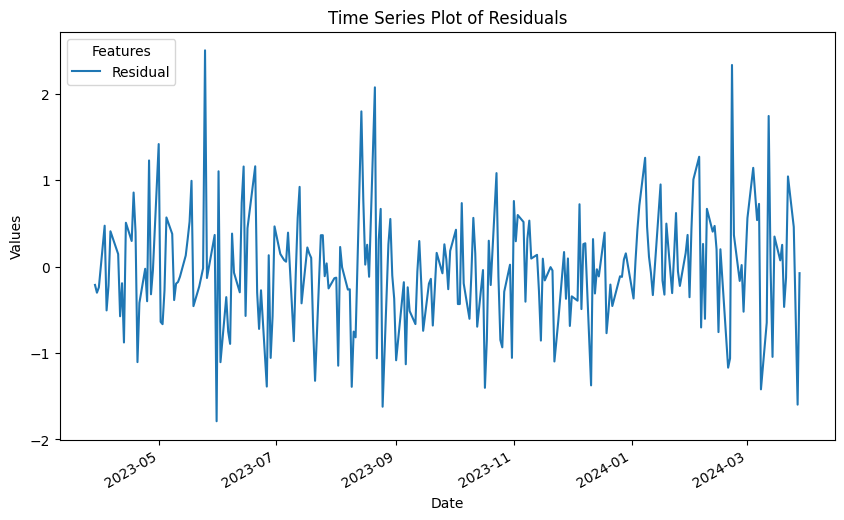

In [ ]:
Z_predict = autoencoder.predict(Z_hat_test)

Z_test_predict = pd.DataFrame(Z_predict, columns = Z_hat_test.columns, index = Z_hat_test.index).T

Z_hat_test_T = Z_hat_test.T

residuals_NVDA = Z_hat_test_T["NVDA"] - Z_test_predict["NVDA"]


plot_data = pd.DataFrame({"NVDA":Z_hat_test_T["NVDA"] , "NVDA predicted":Z_test_predict["NVDA"], "Residual":residuals_NVDA})

display(plot_data)

plot_data["Residual"].plot(figsize=(10, 6))
plt.title('Time Series Plot of Residuals')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend(title='Features')
plt.show()

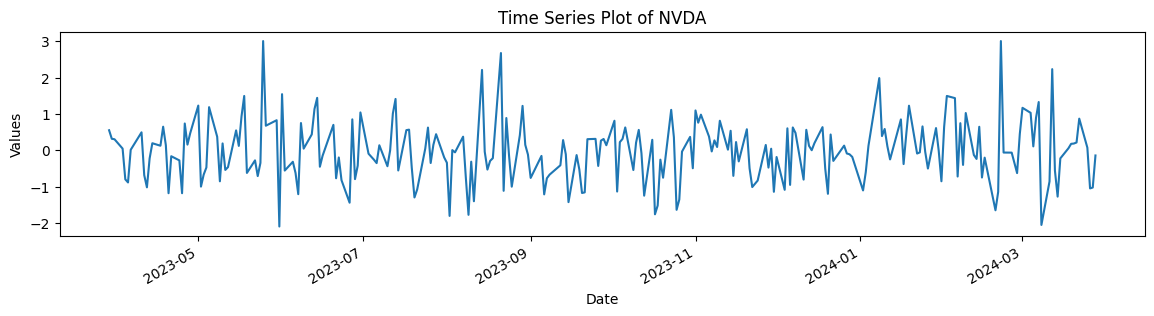

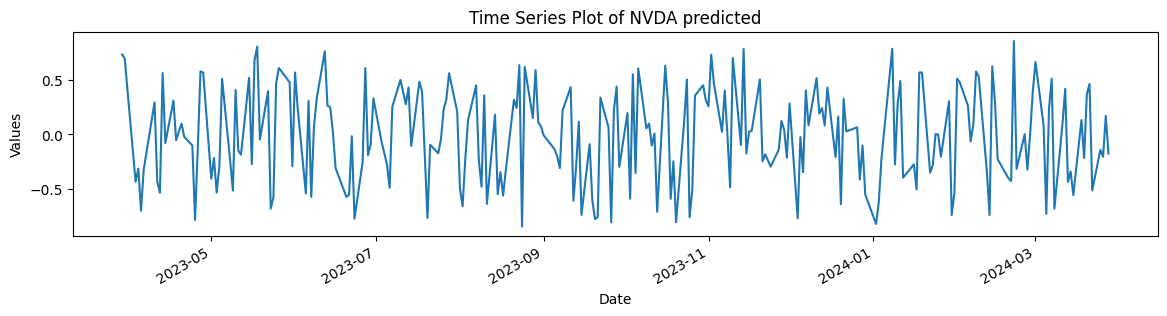

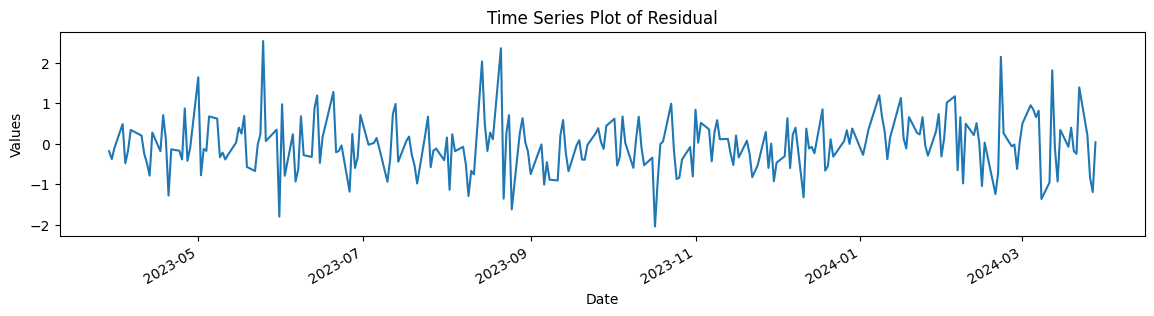

In [ ]:
for series in plot_data:
  plot_data[series].plot(figsize=(14, 3))
  plt.title(f'Time Series Plot of {series}')
  plt.xlabel('Date')
  plt.ylabel('Values')
  plt.show()


<font color=green>Q30: (7 Marks) </font>
<br><font color='green'>
By reading carrefully the paper **[End-to-End Policy Learning of a Statistical Arbitrage Autoencoder Architecture](https://arxiv.org/pdf/2402.08233.pdf)**, answers the following question:
1. **Summarize the Key Actions**: Highlight the main experiments and methodologies employed by the authors in Section 5.
2. **Reproduction Steps**: Detail the necessary steps required to replicate the authors' approach based on the descriptions provided in the paper.
3. **Proposed Improvement**: Suggest one potential enhancement to the methodology that could potentially increase the effectiveness or efficiency of the model.



**Write your answers here:**








